In [1]:
#import denpendencies
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.models import Sequential
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray
import os
import sys
from glob import glob
%matplotlib inline

Using TensorFlow backend.


In [2]:
#import dataset
image = glob( '../his/**/*.png',recursive=True)

(460, 700, 3)

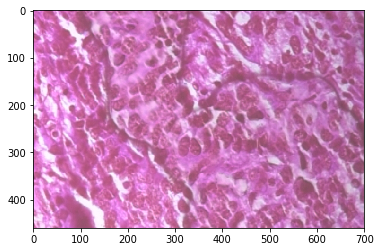

In [3]:
# Let's randomly select one picture from images and see how it looks like before modeling. 
# In this case, we selected the 1000th picture. 
img=str(image[1000])
img=cv2.imread(img)

plt.imshow((img * 255).astype(np.uint8))
plt.imshow(img)
img.shape


In [4]:
#img = cv2.resize(img, (80, 53)) 

In [5]:
#img.shape

In [6]:
#create the first Convolutional layer
import sys
model = Sequential()
model.add(Conv2D(3, (3,3), # number of filter layers   # x and y dimension of kernel
                input_shape=img.shape))

In [7]:

# Keras expects batches of images, so we have to add a dimension to trick it into being nice
img_batch = np.expand_dims(img,axis=0)

In [8]:

conv_img = model.predict(img_batch)

In [9]:
# here we get rid of that added dimension and plot the image
def visualize_img(model, img):
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    img_batch = np.expand_dims(img,axis=0)
    conv_img = model.predict(img_batch)
    conv_img = np.squeeze(conv_img, axis=0)
    print (conv_img.shape)
    plt.imshow((conv_img * 255).astype(np.uint8))

(458, 698, 3)


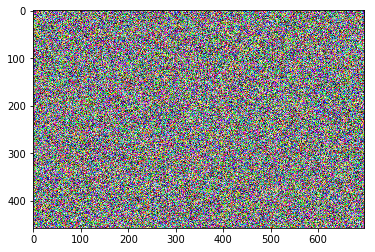

In [10]:
#There is a lot of noisy because all of weights are randomly initialized and the network has not been trained yet

visualize_img(model, img)


In [11]:
#panda with 1 filter
# Note: matplot lib is pretty inconsistent with how it plots these weird cat arrays.
# Try running them a couple of times if the output doesn't quite match the blog post results.
def nice_img_printer(model, panda):
    '''prints the img as a 2d array'''
    img_batch = np.expand_dims(img,axis=0)
    conv_img2 = model.predict(img_batch)

    conv_img2 = np.squeeze(conv_img2, axis=0)
    print (conv_img2.shape)
    conv_img2 = conv_img2.reshape(conv_img2.shape[:2])

    print (conv_img2.shape)
    plt.imshow(conv_img2)

(458, 698, 1)
(458, 698)


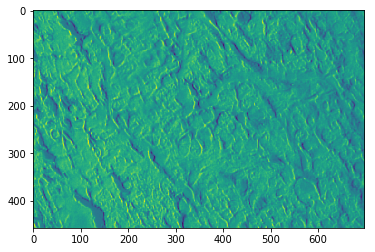

In [12]:
model = Sequential()
model.add(Conv2D(1, (3,3),input_shape=img.shape))

# Keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_img_printer(model, img)


(446, 686, 1)
(446, 686)


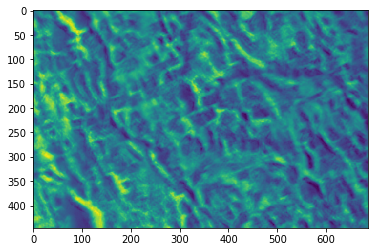

In [13]:
# 15x15 kernel size
model = Sequential()
model.add(Conv2D(1, (15,15), input_shape=img.shape))

nice_img_printer(model, img)

(458, 698, 1)
(458, 698)


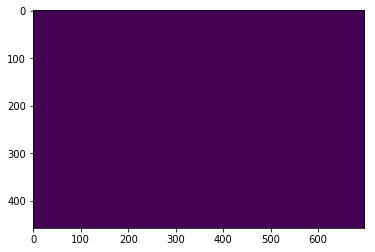

In [14]:
#add relu activation
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=img.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))

nice_img_printer(model, img)

(458, 698, 3)


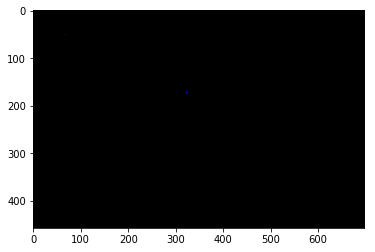

In [15]:
model = Sequential()
model.add(Conv2D(3, (3,3),input_shape=img.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))

visualize_img(model, img)

(91, 139, 1)
(91, 139)


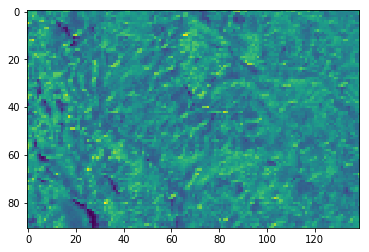

In [16]:
#max pooling
model = Sequential()
model.add(Conv2D(1, (3,3),input_shape=img.shape))
# Lets add a new max pooling layer!
model.add(MaxPooling2D(pool_size=(5,5)))

nice_img_printer(model, img)

(91, 139, 3)


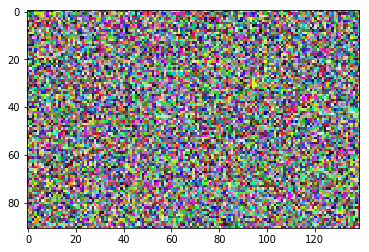

In [17]:
model = Sequential()
model.add(Conv2D(3,(3,3), input_shape=img.shape))
# Lets add a new max pooling layer!
model.add(MaxPooling2D(pool_size=(5,5)))

# nice_img_printer(model, cat)
visualize_img(model, img)

(91, 139, 1)
(91, 139)


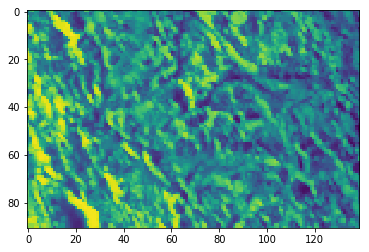

In [18]:
#activation then pooling
model = Sequential()
model.add(Conv2D(1, (3,3),input_shape=img.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

nice_img_printer(model, img)